# Выбор локации для скважины

Задача - построить модель машинного обучения, определяющую регион нефтедобычи с наибольшей возможной прибылью и наименьшим риском убытков

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Загрузите и подготовьте данные. Поясните порядок действий.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
data3 = pd.read_csv('/datasets/geo_data_2.csv')
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
#ищу дубликаты
print(data1['id'].duplicated().sum(), data2['id'].duplicated().sum(), data3['id'].duplicated().sum())
display(data1['id'].value_counts().head(10))
display(data1.query('id == "QcMuo"'))
data1['id'] = data1['id'].drop_duplicates()
data2['id'] = data2['id'].drop_duplicates()
data3['id'] = data3['id'].drop_duplicates()
data1['id'].value_counts()

10 4 4


74z30    2
bxg6G    2
QcMuo    2
A5aEY    2
fiKDv    2
HZww2    2
Tdehs    2
AGS9W    2
bsk9y    2
TtcGQ    2
Name: id, dtype: int64

,id,f0,f1,f2,product
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675


uIidJ    1
Oxbye    1
UvHzs    1
GIBNe    1
ZeEwk    1
        ..
QdJVA    1
HXWkq    1
RRgSB    1
XAib1    1
Sy3CF    1
Name: id, Length: 99990, dtype: int64

Действительно, в данных были дубликаты, но очень мало,  и я их удалила

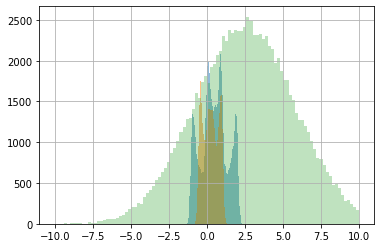

In [6]:
#Распределение признаков 1
data1['f0'].hist(bins=100, alpha=0.5)
data1['f1'].hist(bins=100, alpha=0.5)
data1['f2'].hist(bins=100, alpha=0.3, range=(-10, 10))

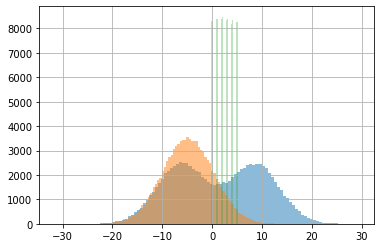

In [7]:
#Распределение признаков 2
data2['f0'].hist(bins=100, alpha=0.5)
data2['f1'].hist(bins=100, alpha=0.5)
data2['f2'].hist(bins=100, alpha=0.3, range=(-10, 10))

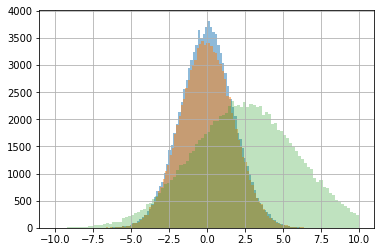

In [8]:
#Распределение признаков 3
data3['f0'].hist(bins=100, alpha=0.5)
data3['f1'].hist(bins=100, alpha=0.5)
data3['f2'].hist(bins=100, alpha=0.3, range=(-10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5d49cf5d0>,
      dtype=object)

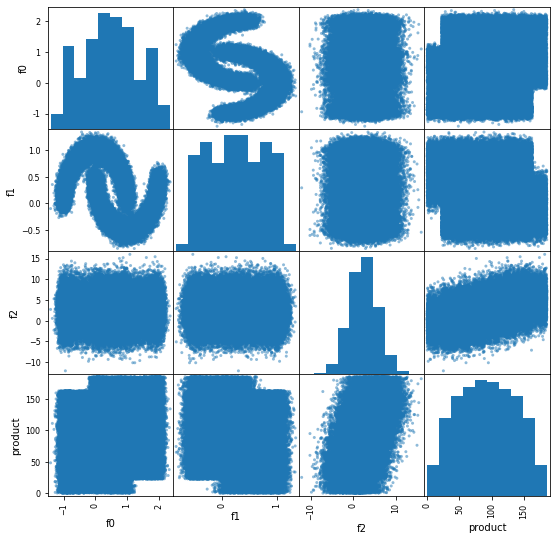

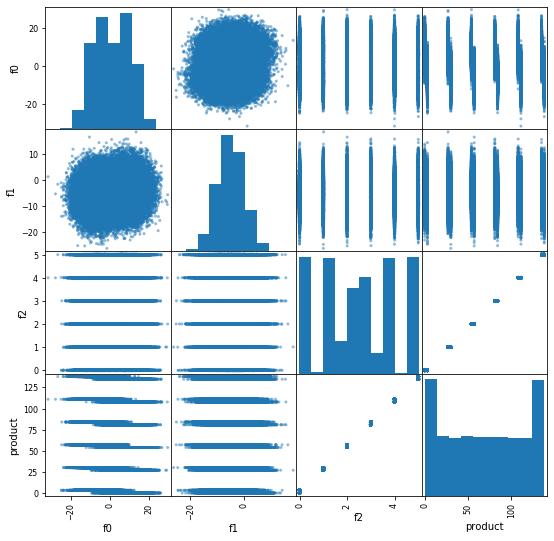

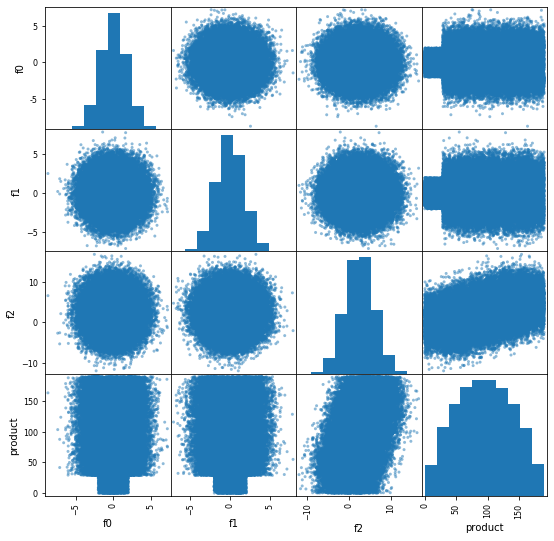

In [9]:
#Матрица корреляции
pd.plotting.scatter_matrix(data1, figsize=(9,9))
pd.plotting.scatter_matrix(data2, figsize=(9,9))
pd.plotting.scatter_matrix(data3, figsize=(9,9))

По матрицам рассеяния видно, что взаимозависимости между признаками в данных нет.


Распределения признаков по регионам имеют совершенно различный вид, только в третьем регионе признаки имеют распределение похожее на нормальное. И во втором регионе признак 2, похоже, определяет распределение целевого признака.

Данные нужно подготовить:
- разделить на признаки (столбцы f0, f1, f2) и целевой признак - product
- разделить на обучающую и валидационную выборки (так как масштабировать нужно, используя обучающую выборку)
- провести масштабирование признаков

In [10]:
#разделяю данные на признаки и целевой признак
features1 = data1.drop(['id', 'product'], axis=1)
target1 = data1['product']
display(features1.head())
display(target1.head())

features2 = data2.drop(['id', 'product'], axis=1)
target2 = data2['product']

features3 = data3.drop(['id', 'product'], axis=1)
target3 = data3['product']

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

In [11]:
#разделяю данные на обучающую и валидационную выборки
features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1,
                                                                                  target1, test_size=0.25, random_state=42)

features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2,
                                                                                  target2, test_size=0.25, random_state=42)

features3_train, features3_valid, target3_train, target3_valid = train_test_split(features3,
                                                                                  target3, test_size=0.25, random_state=42)

print(features1_train.shape, features1_valid.shape, target1_train.shape, target1_valid.shape)
print(features2_train.shape, features2_valid.shape, target2_train.shape, target2_valid.shape)
print(features3_train.shape, features3_valid.shape, target3_train.shape, target3_valid.shape)
display(features1_train.head())

(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)


,f0,f1,f2
98980,1.611925,-0.151874,1.221668
69824,-0.896203,0.369086,-4.537914
9928,0.217569,0.974254,7.369521
75599,0.882945,0.669249,3.114527
95621,-0.941661,0.634162,2.873607


In [12]:
#масштабирую признаки
pd.options.mode.chained_assignment=None
scaler = StandardScaler()

def sca(features_train, features_valid):
    scaler.fit(features_train[['f0', 'f1', 'f2']])
    features_train[['f0', 'f1', 'f2']] = scaler.transform(features_train[['f0', 'f1', 'f2']])
    features_valid[['f0', 'f1', 'f2']] = scaler.transform(features_valid[['f0', 'f1', 'f2']])
    
    return features_train, features_valid

features1_train, features1_valid = sca(features1_train, features1_valid)
features2_train, features2_valid = sca(features2_train, features2_valid)
features3_train, features3_valid = sca(features3_train, features3_valid)

features2_train.head()

,f0,f1,f2
98980,0.911229,0.063780,-0.291331
69824,1.640885,1.320793,1.463778
9928,-0.303818,0.859595,0.297952
75599,1.250304,-0.332629,-0.290244
95621,-0.678630,-0.629111,-0.877242


## Обучение и проверка модели

<b>Обучите и проверьте модель для каждого региона:</b>
2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
2.2. Обучите модель и сделайте предсказания на валидационной выборке.
2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
2.5. Проанализируйте результаты.

In [13]:
model = LinearRegression()
def prediction(features_train, target_train, features_valid, target_valid):
    model.fit(features_train, target_train)
    pred = model.predict(features_valid)
    rmse = np.sqrt(mean_squared_error(target_valid, pred))
    print('Регион 1:')
    print('RMSE', rmse)
    print('Средний запас сырья', pred.mean())
    print()
    
    return pred

pred1 = prediction(features1_train, target1_train, features1_valid, target1_valid)
pred2 = prediction(features2_train, target2_train, features2_valid, target2_valid)
pred3 = prediction(features3_train, target3_train, features3_valid, target3_valid)

Регион 1:
RMSE 37.75660035026169
Средний запас сырья 92.39879990657768

Регион 1:
RMSE 0.8902801001028834
Средний запас сырья 68.71287803913762

Регион 1:
RMSE 40.145872311342174
Средний запас сырья 94.77102387765939



Показатель RMSE и средний запас сырья для 1 и 3 регионов получились схожими (RMSE около 40 и средний запас около 90 тыс. баррелей). Но для региона 2 RMSE оказался очень низким (около 0.9), и запас сырья меньше, чем в остальных регионах - около 70 тыс. баррелей.

Получается, предсказания по 2 региону значительно точнее. Возможно, в целевых признаках по регионам 1 и 3 были большие выбросы, а во 2 нет. Можно посмотреть полученные значения предсказаний и целевые признаки на графиках.

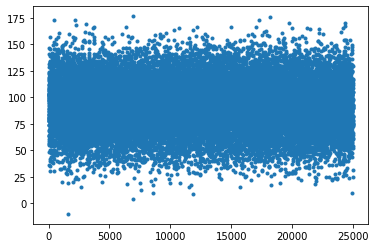

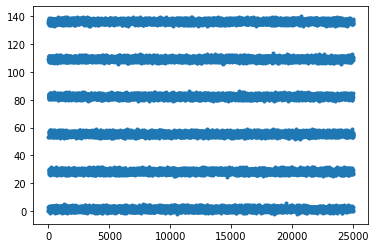

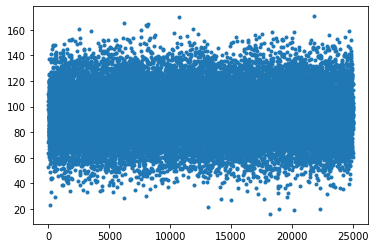

In [14]:
plt.plot(pred1, linestyle='None', marker='.')
plt.show()

plt.plot(pred2, linestyle='None', marker='.')
plt.show()

plt.plot(pred3, linestyle='None', marker='.')
plt.show()

Из графиков предсказаний для трех регионов видно, что график для региона 2 имеет вид, отличающийся от регионов 1 и 3: значения распределены в шести узких интервалах

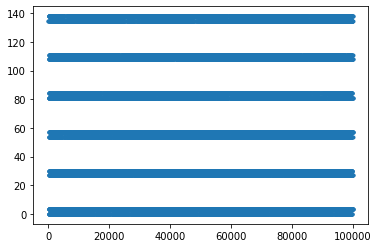

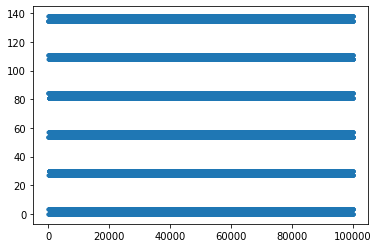

In [15]:
plt.plot(target2_valid, linestyle='None', marker='.')
plt.show()

plt.plot(data2['product'], linestyle='None', marker='.')
plt.show()

Такое же распределение имеет и график целевого признака для региона 2. Чтобы точно исключить, что такой график стал результатом моих преобразований, я проверила целевой признак из таблицы до всех преобразований - он имеет такое же распределение.

Это объясняет, почему по региону 2 такая низкая ошибка у модели.

Возможно, это распределение вызвано тем, что данные были изначально синтетические.

## Подготовка к расчёту прибыли

<b>Подготовьтесь к расчёту прибыли:</b>
3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
3.3. Напишите выводы по этапу подготовки расчёта прибыли.

In [16]:
all_samples = 500
best_samples = 200
barrel_income = 450000
budget = 10000000000
mean1 = pred1.mean()
mean2 = pred2.mean()
mean3 = pred3.mean()

print('Достаточный объем сырья для безубыточной разработки:', budget / (barrel_income * best_samples))
print('Средний запас в регионе 1:', mean1)
print('Средний запас в регионе 2:', mean2)
print('Средний запас в регионе 3:', mean3)

Достаточный объем сырья для безубыточной разработки: 111.11111111111111
Средний запас в регионе 1: 92.39879990657768
Средний запас в регионе 2: 68.71287803913762
Средний запас в регионе 3: 94.77102387765939


Средний запас сырья во всех регионах ниже, чем требуемый для безубыточной разработки скважин (по расчету). Хотя, запас в третьем регионе близок к требуемому.


Скорее всего, в дальнейших расчетах это не будет проблемой, так как для разработки будут выбраны 200 скважин с наибольшим количеством запасов, а сейчас сравнивалось среднее значение по региону.

## Расчёт прибыли и рисков 

<b>Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:</b>
4.1. Выберите скважины с максимальными значениями предсказаний.
4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
4.3. Рассчитайте прибыль для полученного объёма сырья.


<b>Посчитайте риски и прибыль для каждого региона:</b>
5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [17]:
#функция для расчёта прибыли
def region_income(pred, target_valid, all_samples, best_samples):
    target_valid = pd.Series(target_valid)
    pred = pd.Series(pred)
    pred.index = target_valid.index
    best = pred[:all_samples].sort_values(ascending=False)[:best_samples]
    best_target = target_valid[best.index]
    income = sum(best_target) * barrel_income - budget
    return income

print('Прибыль в 1 регионе: {:.0f} млн. рублей'.format(region_income(pred1, target1_valid, all_samples, best_samples)/1000000))
print('Прибыль вo 2 регионе: {:.0f} млн. рублей'.format(region_income(pred2, target2_valid, all_samples, best_samples)/1000000))
print('Прибыль в 3 регионе: {:.0f} млн. рублей'.format(region_income(pred3, target3_valid, all_samples, best_samples)/1000000))

Прибыль в 1 регионе: 486 млн. рублей
Прибыль вo 2 регионе: 541 млн. рублей
Прибыль в 3 регионе: 342 млн. рублей


Среднее значение прибыли по 200 лучшим скважинам *больше нуля*

Регион 1:


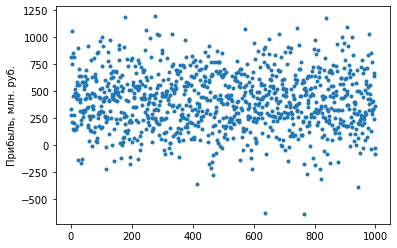

Средняя прибыль: 405 млн. рублей
95% доверительный интервал: от -123 до 928 млн.руб.
Риск убытков: 0.06%

Регион 2:


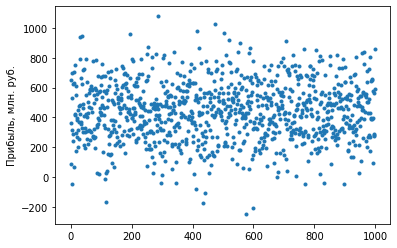

Средняя прибыль: 442 млн. рублей
95% доверительный интервал: от 39 до 820 млн.руб.
Риск убытков: 0.01%

Регион 3:


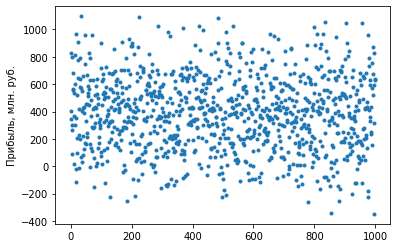

Средняя прибыль: 386 млн. рублей
95% доверительный интервал: от -124 до 932 млн.руб.
Риск убытков: 0.08%



In [19]:
state = np.random.RandomState(12345)

def income(pred, target):
    income = [] 
    count = 0

    for i in range(1000):
        pred = pd.Series(pred)
        target = pd.Series(target)
        pred.index = target.index
        values = pred.sample(frac=1, replace=True, random_state=state)[:all_samples]
        best = values.sort_values(ascending=False)[:best_samples]
        best_target = target[best.index]
        income_n = sum(best_target) * barrel_income  - budget
        income.append(income_n)
        if income_n < 0:
            count += 1
                
    income = pd.Series(income)
    plt.plot(income / 1000000, linestyle='None', marker='.')
    plt.ylabel('Прибыль, млн. руб.')
    plt.show()
    mean_income = income.mean()
    qua1 = income.quantile(q=0.025)
    qua2 = income.quantile(q=0.975)
    risk = (income<0).mean()
    print('Средняя прибыль: {:.0f} млн. рублей'.format(mean_income/1000000))
    print('95% доверительный интервал: от {:.0f}'.format(qua1/1000000), 'до {:.0f} млн.руб.'.format(qua2/1000000))
    print('Риск убытков: {:.2f}%'.format(risk))
    print()
    return

print('Регион 1:')
income(pred1, target1_valid)
print('Регион 2:')
income(pred2, target2_valid)
print('Регион 3:')
income(pred3, target3_valid)

<b>Вывод</b>
В ходе работы были проанализированы данные о пробах нефти в трёх регионах. Была построена модель машинного обучения, для определения региона, где добыча принесёт наибольшую прибыль. Так же были проанализированы возможные риски.

По результатам работы рекомендуется выбрать для разработки новых месторождений <b>регион 2</b>.
Так как он показал наименьший риск убытков среди трех исследуемых регионов, и наибольшую прибыль. Хотя, его изначальное распределение целевого признака сильно отличалось от других регионов.